In [2]:
#Dataset Load and Info
import pandas as pd

file_path = "/content/drive/MyDrive/data_excavate.csv"
df = pd.read_csv(file_path)
print("Colulmns of the dataset:",df.columns)
print("No of rows in the dataset: ",df.shape[0])

Colulmns of the dataset: Index(['functional group', 'A', 'A_OS', 'A'', 'A'_OS', 'A_HOMO-', 'A_HOMO+',
       'A_IE-', 'A_IE+', 'A_LUMO-', 'A_LUMO+', 'A_X-', 'A_X+', 'A_Z_radii-',
       'A_Z_radii+', 'A_e_affin-', 'A_e_affin+', 'Bi', 'B_OS', 'B'', 'B'_OS',
       'B_HOMO-', 'B_HOMO+', 'B_IE-', 'B_IE+', 'B_LUMO-', 'B_LUMO+', 'B_X-',
       'B_X+', 'B_Z_radii-', 'B_Z_radii+', 'B_e_affin-', 'B_e_affin+',
       'PBE band gap', 'μ', 'μĀ', 'μ𝐵 ̅', 't'],
      dtype='object')
No of rows in the dataset:  5152


# **Binary Classification Task (MC - Model 1) -> Classify perovskite materials as insulators (Eg ≥ 0.5 eV) or non-insulators (Eg < 0.5 eV).**

Model Accuracy: 92.05%

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       715
           1       0.93      0.80      0.86       316

    accuracy                           0.92      1031
   macro avg       0.92      0.89      0.90      1031
weighted avg       0.92      0.92      0.92      1031


Confusion Matrix:
 [[697  18]
 [ 64 252]]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 119861 (\N{MATHEMATICAL ITALIC CAPITAL B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


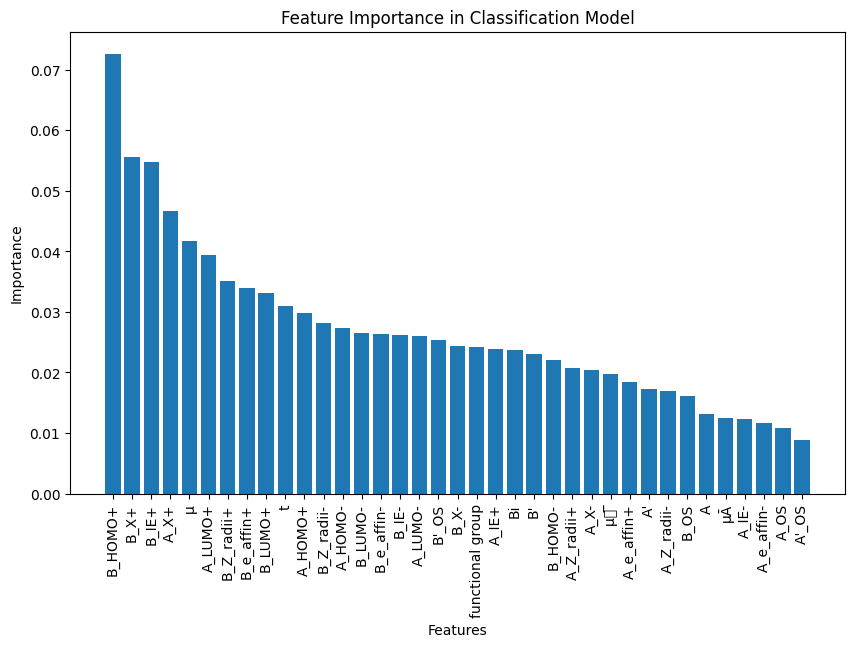

In [3]:
#MODEL 1(CLASSIFICATION)-> using RandomForestClassifier(Better Accuracy)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


file_path = "/content/drive/MyDrive/data_excavate.csv"
df = pd.read_csv(file_path)

df['is_insulator'] = (df['PBE band gap'] >= 0.5).astype(int)

categorical_cols = ['functional group', 'A', "A'", 'Bi', "B'"]
numerical_cols = [col for col in df.columns if col not in categorical_cols + ['PBE band gap', 'is_insulator']]

encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

X = df[categorical_cols + numerical_cols]
y = df['is_insulator']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

#Feature Importance Analysis
importances = clf.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance in Classification Model")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


In [4]:
#MODEL 1 SAVING PROCESS
import joblib

joblib.dump(clf, "/content/drive/MyDrive/classification_model.pkl")
joblib.dump(scaler, "/content/drive/MyDrive/scaler.pkl")

print("Model and scaler saved successfully!")

Model and scaler saved successfully!


In [5]:
#DATASET WITH RESULT COLUMN AFTER MODEL1

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib


model_filename = "/content/drive/MyDrive/classification_model.pkl"
scaler_filename = "/content/drive/MyDrive/scaler.pkl"
clf = joblib.load(model_filename)
scaler = joblib.load(scaler_filename)

test_file_path = "/content/drive/MyDrive/data_excavate.csv"
df_test = pd.read_csv(test_file_path)


categorical_cols = ['functional group', 'A', "A'", 'Bi', "B'"]
numerical_cols = [col for col in df_test.columns if col not in categorical_cols + ['PBE band gap']]


encoder = LabelEncoder()
for col in categorical_cols:
    df_test[col] = encoder.fit_transform(df_test[col])

df_test[numerical_cols] = scaler.transform(df_test[numerical_cols])

X_test = df_test[categorical_cols + numerical_cols]

predictions = clf.predict(X_test)

df_test['Predicted_Class'] = predictions
df_test['Predicted_Label'] = df_test['Predicted_Class'].map({1: 'Insulator', 0: 'Non-Insulator'})

df_test.to_csv("classification_predictions.csv", index=False)
print("Predictions saved to classification_predictions.csv")

print(df_test[['Predicted_Label']].head())

Predictions saved to classification_predictions.csv
  Predicted_Label
0   Non-Insulator
1   Non-Insulator
2   Non-Insulator
3   Non-Insulator
4   Non-Insulator
